In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [107]:
relax = pd.read_csv("Muse Data/chrisrelax.csv", names = np.arange(0,220))

relax = relax.iloc[:,0:110]

relax['chan'] = 1
relax['chan'] = relax.index.map(lambda x: x % 4 + 1)

chan1 = relax.loc[relax['chan'] == 1,].reset_index(drop=True)
chan1.columns = np.arange(1000,1111)
chan2 = relax.loc[relax['chan'] == 2,].reset_index(drop=True)
chan2.columns = np.arange(2000,2111)
chan3 = relax.loc[relax['chan'] == 3,].reset_index(drop=True)
chan3.columns = np.arange(3000,3111)
chan4 = relax.loc[relax['chan'] == 4,].reset_index(drop=True)
chan4.columns = np.arange(4000,4111)

relax = pd.concat([chan1.iloc[:,0:110], chan2.iloc[:,0:110], chan3.iloc[:,0:110], chan4.iloc[:,0:110]], axis=1, join_axes=[chan1.index])
relax['label'] = 'relax'

In [108]:
focus = pd.read_csv("Muse Data/chrisfocus.csv", names = np.arange(0,220))

focus = focus.iloc[:,0:110]

focus['chan'] = 1
focus['chan'] = focus.index.map(lambda x: x % 4 + 1)

chan1 = focus.loc[focus['chan'] == 1,].reset_index(drop=True)
chan1.columns = np.arange(1000,1111)
chan2 = focus.loc[focus['chan'] == 2,].reset_index(drop=True)
chan2.columns = np.arange(2000,2111)
chan3 = focus.loc[focus['chan'] == 3,].reset_index(drop=True)
chan3.columns = np.arange(3000,3111)
chan4 = focus.loc[focus['chan'] == 4,].reset_index(drop=True)
chan4.columns = np.arange(4000,4111)

focus = pd.concat([chan1.iloc[:,0:110], chan2.iloc[:,0:110], chan3.iloc[:,0:110], chan4.iloc[:,0:110]], axis=1, join_axes=[chan1.index])
focus['label'] = 'focus'

In [139]:
values = pd.concat([relax.iloc[:,0:439], focus.iloc[:,0:439]]).reset_index(drop=True)
labels = pd.concat([pd.DataFrame(relax['label']), pd.DataFrame(focus['label'])]).reset_index(drop=True)
c, r = labels.shape
labels = labels.as_matrix().reshape(c,)

In [140]:
labels.shape

(86,)

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(values,labels,test_size=0.2)

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
def cross_val_svm (X,y,n,kern='rbf'):
    clf = svm.SVC(kernel=kern)
    scores = cross_val_score(clf, X, y, cv=n)
    return scores  

In [157]:
cross_val_svm(X_train,y_train,4).mean()

0.67708333333333326

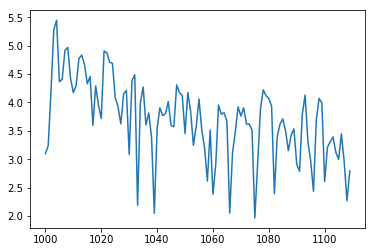

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(values.iloc[1,0:110])